renk bulma

In [ ]:
import cv2
import numpy as np

img = cv2.imread("klon.jpg")

dimension = img.shape
print(dimension)

color = img[420,500]
print(color)

blue = img[420,500,0]
print("blue:", blue)

green = img[420,500,1]
print("green:", green)

red = img[420,500,2]
print("red:", red)

img[420,500,0] = 250
print("new blue:", img[420,500,0])

blue1 = img.item(150,200,0)
print("blue1:", blue1)

img.itemset((150,200,0), 172)
print("new blue1:", img[150,200,0])

cv2.imshow("klon asker", img)
cv2.waitKey(0)
cv2.destroyAllWindows

renk uzayı değiştirme

In [ ]:
import cv2

img = cv2.imread("klon.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow("klon BGR",img)
cv2.imshow("klon RGB",img_rgb)
cv2.imshow("klon HSV",img_hsv)
cv2.imshow("klon gray",img_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

renk uzayı değiştirme video

In [ ]:
import cv2

cap = cv2.VideoCapture("video.mp4")

while True:
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if ret == False:
        break

    cv2.imshow("video", frame)
    if cv2.waitKey(20) & 0xFF == ord("q"):
     break

cap.release()
cv2.destroyAllWindows()

hsv kodları bulma (renkseçme)

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

def nothing(x):
    pass

cv2.namedWindow("Trackbar")
cv2.resizeWindow("Trackbar", 400,400)

cv2.createTrackbar("Lower - H", "Trackbar", 0, 180, nothing)
cv2.createTrackbar("Lower - S", "Trackbar", 0, 255, nothing)
cv2.createTrackbar("Lower - V", "Trackbar", 0, 255, nothing)

cv2.createTrackbar("Upper - H", "Trackbar", 0, 180, nothing)
cv2.createTrackbar("Upper - S", "Trackbar", 0, 255, nothing)
cv2.createTrackbar("Upper - V", "Trackbar", 0, 255, nothing)

cv2.setTrackbarPos("Upper - H", "Trackbar", 180)
cv2.setTrackbarPos("Upper - S", "Trackbar", 255)
cv2.setTrackbarPos("Upper - V", "Trackbar", 255)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_h = cv2.getTrackbarPos("Lower - H", "Trackbar")
    lower_s = cv2.getTrackbarPos("Lower - S", "Trackbar")
    lower_v = cv2.getTrackbarPos("Lower - V", "Trackbar")

    upper_h = cv2.getTrackbarPos("Upper - H", "Trackbar")
    upper_s = cv2.getTrackbarPos("Upper - S", "Trackbar")
    upper_v = cv2.getTrackbarPos("Upper - V", "Trackbar")

    lower_color = np.array([lower_h, lower_s, lower_v])
    upper_color = np.array([upper_h, upper_s, upper_v])

    mask = cv2.inRange(frame_hsv, lower_color, upper_color)

    cv2.imshow("Original", frame)
    cv2.imshow("Mask", mask)

    if cv2.waitKey(20) & 0xFF == ord("q"):
        break


cap.release()
cv2.destroyAllWindows()

morfoloji

In [ ]:
import cv2
import numpy as np

img = cv2.imread("klon.jpg",0)
cv2.imshow("img", img)

kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(img, kernel, iterations=1)
cv2.imshow("erosion",erosion)

dilation = cv2.dilate(img, kernel, iterations=5)
cv2.imshow("dilation",dilation)

opening = cv2.erode(img, cv2.MORPH_OPEN, kernel)
cv2.imshow("opening",opening)

closeing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2.imshow("closeing",closeing)

gardient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
cv2.imshow("gardient",gardient)

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow("tophat",tophat)

cv2.waitKey(0)
cv2.destroyAllWindows()

histogram pencere üzerine

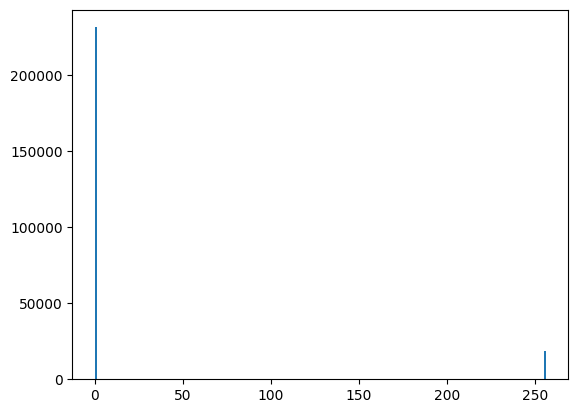

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros((500,500), np.uint8)
cv2.rectangle(img, (0,60), (200,150), (255,255,255), -1)

cv2.imshow("img",img)

plt.hist(img.ravel(), 256, [0,256])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

histogram resim üzerinde

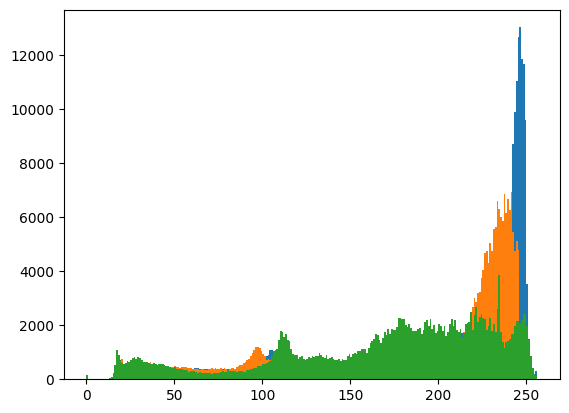

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("smile.jpg")
b,g,r = cv2.split(img)
cv2.imshow("img",img)

plt.hist(b.ravel(), 256, [0,256])
plt.hist(g.ravel(), 256, [0,256])
plt.hist(r.ravel(), 256, [0,256])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()